<a href="https://colab.research.google.com/github/youngIcom/Machine_Learning_Project/blob/main/Spike_SKU_Feature_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Apa itu SKU Spike?

Dalam dunia e-commerce, perilaku pengguna bisa berubah dengan sangat cepat. Salah satu fenomena penting yang perlu dikenali sejak dini adalah SKU spike—yaitu lonjakan interaksi atau permintaan terhadap suatu produk secara tiba-tiba dalam periode waktu yang relatif singkat.

SKU spike biasanya terjadi ketika sebuah produk (SKU) mendadak menjadi pusat perhatian: bisa karena viral di media sosial, direkomendasikan oleh influencer, sedang diskon besar-besaran, atau bahkan karena permintaan musiman yang tidak terduga. Lonjakan ini bisa terlihat dari peningkatan tajam dalam metrik seperti clicks, page views, atau add to cart, yang kemudian bisa diikuti oleh lonjakan pembelian.

##Ciri-ciri Umum Terjadinya Spike SKU:

    Metrik klik atau kunjungan SKU meningkat drastis dibanding hari-hari sebelumnya
    Produk ramai dibicarakan di berbagai channel sekaligus (entri dari referral beragam)
    Rasio add-to-cart atau wishlist naik walau belum banyak transaksi
    Lonjakan biasanya tidak merata ke semua produk — hanya terjadi di SKU tertentu

##Dampak Spike — Peluang dan Risiko

###Jika terdeteksi lebih awal:

    Tim bisa menambah stok sebelum kehabisan
    Strategi promosi bisa dioptimalkan saat antusiasme tinggi
    Prioritas logistik bisa diarahkan ke SKU yang paling menjanjikan

###Jika tidak terdeteksi lebih awal:

    Stok habis saat permintaan sedang tinggi → kehilangan potensi penjualan
    Lead time restock terlalu lama → pelanggan kecewa
    Bisa terjadi overstock karena salah prediksi tren yang sudah lewat


In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/komdigi/tbl_funnel.csv")

print(df)

             date        sku_id  clicks  add_to_cart  purchase  spike_flag  \
0      2024-01-01  DQProduk-001       7            0         0           0   
1      2024-01-02  DQProduk-001      26            3         1           0   
2      2024-01-03  DQProduk-001       7            0         0           0   
3      2024-01-04  DQProduk-001       4            0         0           0   
4      2024-01-05  DQProduk-001      12            2         1           0   
...           ...           ...     ...          ...       ...         ...   
22360  2025-09-26  DQProduk-035      12            0         0           0   
22361  2025-09-27  DQProduk-035       6            0         0           0   
22362  2025-09-28  DQProduk-035       7            0         0           0   
22363  2025-09-29  DQProduk-035       7            1         1           0   
22364  2025-09-30  DQProduk-035       9            1         0           0   

       direct_clicks  google_clicks  ads_clicks  email_clicks  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22365 entries, 0 to 22364
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              22365 non-null  object
 1   sku_id            22365 non-null  object
 2   clicks            22365 non-null  int64 
 3   add_to_cart       22365 non-null  int64 
 4   purchase          22365 non-null  int64 
 5   spike_flag        22365 non-null  int64 
 6   direct_clicks     22365 non-null  int64 
 7   google_clicks     22365 non-null  int64 
 8   ads_clicks        22365 non-null  int64 
 9   email_clicks      22365 non-null  int64 
 10  instagram_clicks  22365 non-null  int64 
 11  mobile_clicks     22365 non-null  int64 
 12  desktop_clicks    22365 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 2.2+ MB


Percentage-Based Click Velocity adalah metrik yang menghitung persentase perubahan jumlah klik suatu produk dari hari sebelumnya ke hari ini.

In [11]:
daily_df = df.groupby ('date').sum(numeric_only=True).reset_index()

daily_df['click_velocity'] = daily_df['clicks'].pct_change()

print(daily_df)

           date  clicks  add_to_cart  purchase  spike_flag  direct_clicks  \
0    2024-01-01     392           41        17           0             73   
1    2024-01-02     394           24         9           0             76   
2    2024-01-03     330           25         7           0             62   
3    2024-01-04     349           24         9           0             56   
4    2024-01-05     373           38        11           0             83   
..          ...     ...          ...       ...         ...            ...   
634  2025-09-26     375           38        11           0             75   
635  2025-09-27     400           37        11           0             84   
636  2025-09-28     421           35        12           0             85   
637  2025-09-29     390           25        12           0             80   
638  2025-09-30     360           18         7           0             72   

     google_clicks  ads_clicks  email_clicks  instagram_clicks  mobile_clic

Rolling Mean Click Velocity

In [12]:
# 3. Hitung rata-rata bergerak (rolling mean) 7 hari
daily_df['rolling_mean_click'] = daily_df['clicks'].shift(1).rolling(window=7, min_periods=1).mean()

# 4. Hitung Rolling-Mean Click Velocity
daily_df['click_velocity_rolling'] = daily_df['clicks'] / daily_df['rolling_mean_click']

# 5. Tampilkan hasilnya
print(daily_df)

           date  clicks  add_to_cart  purchase  spike_flag  direct_clicks  \
0    2024-01-01     392           41        17           0             73   
1    2024-01-02     394           24         9           0             76   
2    2024-01-03     330           25         7           0             62   
3    2024-01-04     349           24         9           0             56   
4    2024-01-05     373           38        11           0             83   
..          ...     ...          ...       ...         ...            ...   
634  2025-09-26     375           38        11           0             75   
635  2025-09-27     400           37        11           0             84   
636  2025-09-28     421           35        12           0             85   
637  2025-09-29     390           25        12           0             80   
638  2025-09-30     360           18         7           0             72   

     google_clicks  ads_clicks  email_clicks  instagram_clicks  mobile_clic

In [19]:
# Mendefenisikan fungsi harian
def calculate_entropy(clicks_series):
  total_clicks = clicks_series.sum()
  if total_clicks == 0:
    return 0
  probabilities = clicks_series / total_clicks
  entropy = -np.sum(probabilities * np.log2(probabilities + 0.0000001))
  return entropy

# Definisikan nama dari kolom-kolom yang berisi informasi sumber referral dan masukkan ke dalam list yang disimpan sebagai variabel click_source_columns
click_source_columns = ['direct_clicks', 'google_clicks', 'ads_clicks', 'email_clicks', 'instagram_clicks']

# Gunakan fungsi yang tadi sudah didefinisikan, aplikasikan pada kolom-kolom yang mengandung informasi sumber referral. Hasilnya disimpan dalam kolom baru yang dinamakan referral_entropy
daily_df['referal_entropy'] = daily_df[click_source_columns].apply(lambda X: calculate_entropy(X.to_numpy()), axis=1)

print(daily_df)

           date  clicks  add_to_cart  purchase  spike_flag  direct_clicks  \
0    2024-01-01     392           41        17           0             73   
1    2024-01-02     394           24         9           0             76   
2    2024-01-03     330           25         7           0             62   
3    2024-01-04     349           24         9           0             56   
4    2024-01-05     373           38        11           0             83   
..          ...     ...          ...       ...         ...            ...   
634  2025-09-26     375           38        11           0             75   
635  2025-09-27     400           37        11           0             84   
636  2025-09-28     421           35        12           0             85   
637  2025-09-29     390           25        12           0             80   
638  2025-09-30     360           18         7           0             72   

     google_clicks  ads_clicks  email_clicks  instagram_clicks  mobile_clic

Menentukan spike_flag melalui metode quantile

In [18]:
cv_threshold = daily_df['click_velocity_rolling'].quantile(0.90)

entropy_threshold = daily_df['referal_entropy'].quantile(0.25)

daily_df['spike_flag_clicks'] = np.where(daily_df['click_velocity_rolling'] > cv_threshold, 1, 0)

daily_df['spike_flag_entropy'] = np.where(daily_df['referal_entropy'] > entropy_threshold, 1, 0)

daily_df['spike_flag'] = ((daily_df['spike_flag_clicks'] == 1) &
                          (daily_df['spike_flag_entropy'] == 1)
                          ).astype(int)

print(daily_df['spike_flag'].tail(10))

629    0
630    0
631    0
632    0
633    0
634    0
635    0
636    0
637    0
638    0
Name: spike_flag, dtype: int64


evaluasi visualisasi

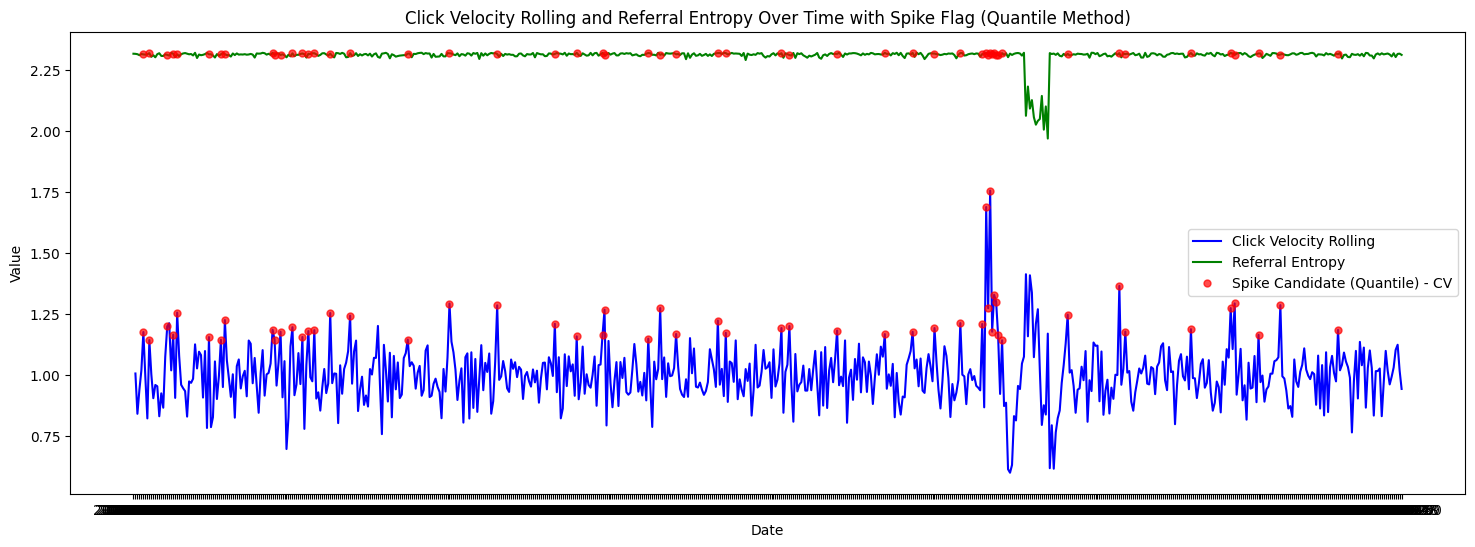

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# Plot grafik date vs click_velocity_rolling, berikan label 'Click Velocity Rolling' dan warna biru
plt.plot(daily_df['date'], daily_df['click_velocity_rolling'], label='Click Velocity Rolling', color='blue')

# Plot grafik date vs referal_entropy, berikan label ‘Referral Entropy’ dan warna hijau
plt.plot(daily_df['date'], daily_df['referal_entropy'], label='Referral Entropy', color='green')

# Definisikan daftar tanggal yang spike_flag = 1 dan simpan dalam variabel spike_dates
spike_dates = daily_df[daily_df['spike_flag'] == 1]['date']

# Plot area pada grafik yang terdapat spike_flag = 1 untuk grafik date vs click_velocity_rolling dan grafik date vs referal_entropy
plt.plot(spike_dates, daily_df[daily_df['spike_flag'] == 1]['click_velocity_rolling'], 'ro', markersize=5, label='Spike Candidate (Quantile) - CV', alpha=0.7)
plt.plot(spike_dates, daily_df[daily_df['spike_flag'] == 1]['referal_entropy'], 'ro', markersize=5, alpha=0.7)

# Berikan nama pada: sumbu X sebagai ‘Date’; sumbu Y sebagai ‘value’, dan judul sebagai ‘Click Velocity Rolling and Referral Entropy Over Time with Spike Flag (Quantile Method)’
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Click Velocity Rolling and Referral Entropy Over Time with Spike Flag (Quantile Method)')

# Munculkan legend
plt.legend()

# Tampilkan keseluruhan grafik tersebut.
plt.show()